Name: Muley, Tushar

Assignment: DSC 540 Term Project

# Milestone 2: Cleaning/Formatting Flat File Source
Week 5 and 6

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
#Read and load file into dataframe
df_drivers=pd.read_csv('drivers.csv')

In [3]:
#View first 10 records of csv file
df_drivers.head(10)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


In [4]:
#Check of missing data values.
for c in df_drivers.columns:
    miss=df_drivers[c].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(c,miss))
    else:
        print('{} has NO missing values'.format(c))

driverId has NO missing values
driverRef has NO missing values
number has NO missing values
code has NO missing values
forename has NO missing values
surname has NO missing values
dob has NO missing values
nationality has NO missing values
url has 1 missing values


In [5]:
#Confirm the size of the data before starting clean up process.
df_drivers.shape

(848, 9)

In [6]:
#Nulls are codes as '\N' in this data set. We want to count the number of these values.
df_drivers['number'].value_counts()

\N    803
4       2
28      2
88      2
6       2
10      2
99      2
45      1
14      1
2       1
77      1
55      1
94      1
30      1
35      1
44      1
9       1
11      1
63      1
7       1
25      1
13      1
27      1
19      1
18      1
23      1
98      1
12      1
22      1
26      1
20      1
33      1
31      1
21      1
17      1
16      1
53      1
8       1
3       1
5       1
Name: number, dtype: int64

Note/Findings:

Of the 848 values in the drivers data set 803 have the '\N' value. These are considered null values and of no use. For this analysis we don't need number column so it will be removed durin the cleaning process.

1. Remove columns that are not needed for this analysis

In [7]:
#Remove number and url as they are not need for analysis
df_drivers_updt=df_drivers.drop(['number','url'],axis=1)

In [8]:
#Review changes
df_drivers_updt.head(20)

,driverId,driverRef,code,forename,surname,dob,nationality
0,1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
5,6,nakajima,NAK,Kazuki,Nakajima,1985-01-11,Japanese
6,7,bourdais,BOU,Sébastien,Bourdais,1979-02-28,French
7,8,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish
8,9,kubica,KUB,Robert,Kubica,1984-12-07,Polish
9,10,glock,GLO,Timo,Glock,1982-03-18,German


2. Update column names for better reference

In [9]:
#Update columns.
df_drivers_updt = df_drivers_updt.rename(columns={'driverId':'driver_id','driverRef':'driver_ref',
                                                'forename':'first_nm','surname':'last_nm',
                                                'nationality':'driver_nationality'})

In [10]:
#Review changes
df_drivers_updt

,driver_id,driver_ref,code,first_nm,last_nm,dob,driver_nationality
0,1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...
843,845,sirotkin,SIR,Sergey,Sirotkin,1995-08-27,Russian
844,846,norris,NOR,Lando,Norris,1999-11-13,British
845,847,russell,RUS,George,Russell,1998-02-15,British
846,848,albon,ALB,Alexander,Albon,1996-03-23,Thai


3. Check for nulls and missing values for remaining fields

In [11]:
#Overall check of missings
df_drivers_updt.isnull()

,driver_id,driver_ref,code,first_nm,last_nm,dob,driver_nationality
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
843,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False
846,False,False,False,False,False,False,False


In [12]:
#Detail review of missing values to confirm nothing is missing

for c in df_drivers_updt.columns:
    miss=df_drivers_updt[c].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(c,miss))
    else:
        print('{} has NO missing values'.format(c))

driver_id has NO missing values
driver_ref has NO missing values
code has NO missing values
first_nm has NO missing values
last_nm has NO missing values
dob has NO missing values
driver_nationality has NO missing values


Notes/Findings:

No missing data in the dataframe. Confirmed by using the sum to show a more condensed view. of missing data.

In [13]:
#Backup changes at this point
df_drivers_bkup = df_drivers_updt

In [14]:
#Confirm df_drivers_bkup is viewable
df_drivers_bkup.head(20)

,driver_id,driver_ref,code,first_nm,last_nm,dob,driver_nationality
0,1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
5,6,nakajima,NAK,Kazuki,Nakajima,1985-01-11,Japanese
6,7,bourdais,BOU,Sébastien,Bourdais,1979-02-28,French
7,8,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish
8,9,kubica,KUB,Robert,Kubica,1984-12-07,Polish
9,10,glock,GLO,Timo,Glock,1982-03-18,German


4. Reset the index from default to driver_id

In [15]:
df_drivers_updt = df_drivers_updt.set_index('driver_id')

In [16]:
#Confirm changes took hold
df_drivers_updt.head(42)

,driver_ref,code,first_nm,last_nm,dob,driver_nationality
driver_id,,,,,,
1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German
3,rosberg,ROS,Nico,Rosberg,1985-06-27,German
4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish
5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
6,nakajima,NAK,Kazuki,Nakajima,1985-01-11,Japanese
7,bourdais,BOU,Sébastien,Bourdais,1979-02-28,French
8,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish
9,kubica,KUB,Robert,Kubica,1984-12-07,Polish


5.Check for duplicate rows based on all columns.

In [17]:
#df_drivers_updt.duplicated(subset=['driver_ref'])
duplicate = df_drivers_updt[df_drivers_updt.duplicated()]

In [18]:
#Show duplicate data.
duplicate

,driver_ref,code,first_nm,last_nm,dob,driver_nationality
driver_id,,,,,,


Notes/Findings:
No duplicates found in the data. It is pretty clean data.

6.Make sure case is the same in all driver_ref column. It should be lower case.

In [19]:
#Backup changes at this point
df_drivers_bkup = df_drivers_updt
#Confirm df_drivers_bkup is viewable
df_drivers_bkup.head(20)


,driver_ref,code,first_nm,last_nm,dob,driver_nationality
driver_id,,,,,,
1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German
3,rosberg,ROS,Nico,Rosberg,1985-06-27,German
4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish
5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
6,nakajima,NAK,Kazuki,Nakajima,1985-01-11,Japanese
7,bourdais,BOU,Sébastien,Bourdais,1979-02-28,French
8,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish
9,kubica,KUB,Robert,Kubica,1984-12-07,Polish


6. Make driver_ref column all lower case and the code field all upper case.

In [20]:
df_drivers_updt['driver_ref'] = df_drivers_updt['driver_ref'].str.lower()
df_drivers_updt.head(20)

,driver_ref,code,first_nm,last_nm,dob,driver_nationality
driver_id,,,,,,
1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German
3,rosberg,ROS,Nico,Rosberg,1985-06-27,German
4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish
5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
6,nakajima,NAK,Kazuki,Nakajima,1985-01-11,Japanese
7,bourdais,BOU,Sébastien,Bourdais,1979-02-28,French
8,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish
9,kubica,KUB,Robert,Kubica,1984-12-07,Polish


In [21]:
df_drivers_updt['code'] = df_drivers_updt['code'].str.upper()
df_drivers_updt.head(20)

,driver_ref,code,first_nm,last_nm,dob,driver_nationality
driver_id,,,,,,
1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German
3,rosberg,ROS,Nico,Rosberg,1985-06-27,German
4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish
5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
6,nakajima,NAK,Kazuki,Nakajima,1985-01-11,Japanese
7,bourdais,BOU,Sébastien,Bourdais,1979-02-28,French
8,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish
9,kubica,KUB,Robert,Kubica,1984-12-07,Polish


In [22]:
#Backup the changes.
df_drivers_bkup = df_drivers_updt
#Confirm df_drivers_bkup is viewable
df_drivers_bkup.head(20)


,driver_ref,code,first_nm,last_nm,dob,driver_nationality
driver_id,,,,,,
1,hamilton,HAM,Lewis,Hamilton,1985-01-07,British
2,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German
3,rosberg,ROS,Nico,Rosberg,1985-06-27,German
4,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish
5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish
6,nakajima,NAK,Kazuki,Nakajima,1985-01-11,Japanese
7,bourdais,BOU,Sébastien,Bourdais,1979-02-28,French
8,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish
9,kubica,KUB,Robert,Kubica,1984-12-07,Polish


# Loading additional data from separate CSV

In [23]:
#Read and load file into dataframe
df_f1_races=pd.read_csv('races.csv')

In [24]:
#Take a peek at the data
df_f1_races.head(20)

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,4/5/2009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
5,6,2009,6,6,Monaco Grand Prix,5/24/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...
6,7,2009,7,5,Turkish Grand Prix,6/7/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...
7,8,2009,8,9,British Grand Prix,6/21/2009,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...
8,9,2009,9,20,German Grand Prix,7/12/2009,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...
9,10,2009,10,11,Hungarian Grand Prix,7/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...


1. Finding outliers in the number of races.

In [25]:
df=df_f1_races.filter(['year'],axis=1)

In [41]:
df

,year
0,2009
1,2009
2,2009
3,2009
4,2009
...,...
1030,2020
1031,2020
1032,2020
1033,2020


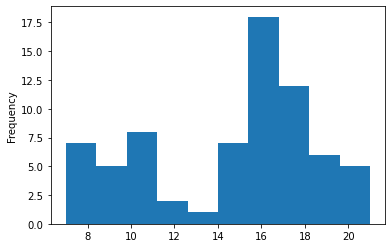

In [26]:
df['year'].value_counts().plot.hist()

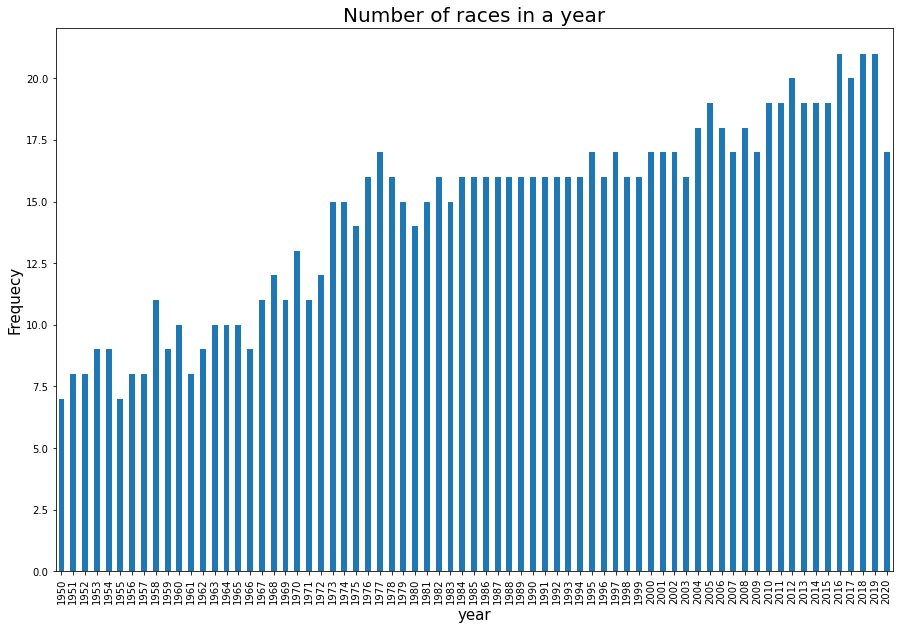

In [44]:
plt.figure(figsize=(15,10))
plt.xlabel('Year',fontsize=15)
plt.ylabel('Frequecy', fontsize=15)
plt.title('Number of races in a year', fontsize=20)
df.groupby('year').size().plot.bar()

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Year',fontsize=15)
plt.ylabel('Frequecy', fontsize=15)
plt.title('Number of races in a year', fontsize=20)

Notes/Finding

No year stands out as an issue. 2020 did have lesser races than in 2019 but there were cancelation due to COVID-19 early in the season during March and April. Those races where held in Austialia, Bahrain and China. Racing did not start up until July.

2. Review the data

In [30]:
df_f1_races.shape

(1035, 8)

In [31]:
#Check of missing data values.
for c in df_f1_races.columns:
    miss=df_f1_races[c].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(c,miss))
    else:
        print('{} has NO missing values'.format(c))

raceId has NO missing values
year has NO missing values
round has NO missing values
circuitId has NO missing values
name has NO missing values
date has NO missing values
time has 731 missing values
url has NO missing values


In [32]:
#Remove number and url as they are not need for analysis
df_f1_races_updt=df_f1_races.drop(['time','url'],axis=1)

In [33]:
#Check of missing data values.
for c in df_f1_races_updt.columns:
    miss=df_f1_races_updt[c].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(c,miss))
    else:
        print('{} has NO missing values'.format(c))

raceId has NO missing values
year has NO missing values
round has NO missing values
circuitId has NO missing values
name has NO missing values
date has NO missing values


#Updated column names for better reading of data


In [34]:
#Show current columns
df_f1_races_updt.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date'], dtype='object')

In [37]:
#Updated columns names
df_f1_races_updt = df_f1_races_updt.rename(columns={'raceId':'race_id','circuitId':'circuit_id',
                                                'name':'nm_of_race','date':'date_of_race'})

In [38]:
#Check updates
df_f1_races_updt.columns

Index(['race_id', 'year', 'round', 'circuit_id', 'nm_of_race', 'date_of_race'], dtype='object')

# Loading third file with pitstop data from separate CSV

In [128]:
#Load pitstop data
df_pit_stops=pd.read_csv('pit_stops.csv')

In [129]:
#View data
df_pit_stops.head(10)

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
5,841,22,1,13,17:24:29,23.643,23643
6,841,20,1,14,17:25:17,22.603,22603
7,841,814,1,14,17:26:03,24.863,24863
8,841,816,1,14,17:26:50,25.259,25259
9,841,67,1,15,17:27:34,25.342,25342


In [130]:
#Udate columns names to match other columns names from drivers file and race file
df_pit_stops = df_pit_stops.rename(columns={'raceId':'race_id','driverId':'driver_id','stop':'num_of_pit_stops',
                                            'lap':'lap_num','time':'time_24h','duration':'stop_duration',
                                            'milliseconds':'duration_milli_sec'})

In [131]:
#Review column changes
df_pit_stops.columns

Index(['race_id', 'driver_id', 'num_of_pit_stops', 'lap_num', 'time_24h',
       'stop_duration', 'duration_milli_sec'],
      dtype='object')

In [132]:
#Check the data type on all colummns:
df_pit_stops.dtypes

race_id                int64
driver_id              int64
num_of_pit_stops       int64
lap_num                int64
time_24h              object
stop_duration         object
duration_milli_sec     int64
dtype: object

In [133]:
import seaborn as sns

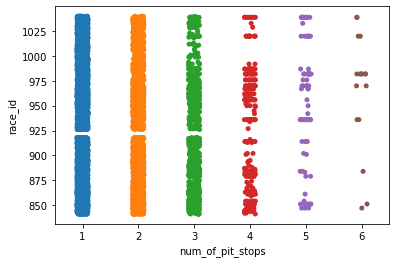

In [134]:
#Visually check what the data looks like.
ax = sns.stripplot(x='num_of_pit_stops', y='race_id', data=df_pit_stops, jitter=True)



Notes/Findings

The data looks pretty normal in that normal races will have between 1 and 3 pitstops. Normally 3 pitstops will occur for regulation tire changes. More than 5 is a lot but if cars have trouble on during the race it is possible. There are not issue in the data related to the number of pitstops. I can drop data with pitstops that are greater than 5.

In [190]:
#Drop rows with pitstops greater than 5
df_pit_stops_updt = df_pit_stops[df_pit_stops['num_of_pit_stops']<=5]

In [174]:
#Confirm the data has been removed.
df_pit_stops_updt[df_pit_stops_updt['num_of_pit_stops']>5]

,race_id,driver_id,num_of_pit_stops,lap_num,time_24h,stop_duration,duration_milli_sec


In [175]:
df_pit_stops_updt

,race_id,driver_id,num_of_pit_stops,lap_num,time_24h,stop_duration,duration_milli_sec
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
7780,1040,8,1,35,15:18:43,33.317,33317
7781,1040,842,2,42,15:30:21,29.409,29409
7782,1040,154,2,42,15:31:06,29.988,29988
7783,1040,846,2,47,15:39:13,31.368,31368


In [78]:
#Update stop_duration from type object to type float so calculation can be done on the data later.

df_pit_stops_updt['stop_duration'] = pd.to_numeric(df_pit_stops_updt['stop_duration'])


ValueError: Unable to parse string "16:44.718" at position 749

Notes/Findings:

There appears to be an error in the data. Durations are all in float format but the error above indicated one of the durations is in the incorrect format at position 749.


In [176]:
#Finding the offending rows using iloc
print(df_pit_stops_updt.iloc[749])

race_id                     853
driver_id                   817
num_of_pit_stops              1
lap_num                       1
time_24h               14:08:50
stop_duration         16:44.718
duration_milli_sec      1004718
Name: 751, dtype: object


In [177]:
#Double check
df_pit_stops_updt.loc[(df_pit_stops_updt['race_id']== 853) & (df_pit_stops_updt['driver_id']==817)]

,race_id,driver_id,num_of_pit_stops,lap_num,time_24h,stop_duration,duration_milli_sec
751,853,817,1,1,14:08:50,16:44.718,1004718
771,853,817,2,20,14:55:30,30.777,30777


Notes/Findings:
There is not error the duration is 16 minutes, 44seconds and 718 milli seconds. This show up as an error cause the stop was longer then the norm.

In [192]:
#Do a backup
df_pit_stops_bkup = df_pit_stops_updt 

In [193]:
df_pit_stops_bkup

,race_id,driver_id,num_of_pit_stops,lap_num,time_24h,stop_duration,duration_milli_sec
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
7780,1040,8,1,35,15:18:43,33.317,33317
7781,1040,842,2,42,15:30:21,29.409,29409
7782,1040,154,2,42,15:31:06,29.988,29988
7783,1040,846,2,47,15:39:13,31.368,31368


In [180]:
df_pit_stops_updt.columns.get_loc('stop_duration')

5

In [194]:
#Updating the stop_duration from 16:44.718 to 1004.718 seconds.
df_pit_stops_updt.loc[749:,'stop_duration']=1004.718


C:\Users\Tushar\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [195]:
#Confirm value has been replaced with total second from minutes and seconds.
print(df_pit_stops_updt.iloc[749])

race_id                    853
driver_id                  817
num_of_pit_stops             1
lap_num                      1
time_24h              14:08:50
stop_duration          1004.72
duration_milli_sec     1004718
Name: 751, dtype: object


# Milestone 3: Cleaning/Formatting Web Source
Week 7 and 8

In [1]:
#Import needed libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
#Website URL
url = 'https://en.wikipedia.org/wiki/List_of_Formula_One_circuits'
#Read the wiki site
html = pd.read_html(url)

In [3]:
#The number of tables
print('Number of tables on the site: ',len(html))


Number of tables on the site:  5


In [4]:
#Copy the table to a dataframe and preview it.
df_circuits = html[2]
#Print the table below
df_circuits

,Circuit,Map,Type,Direction,Location,Last length used,Grands Prix,Season(s),Grands Prix held
0,Adelaide Street Circuit,NaN,Street circuit,Clockwise,"Adelaide, Australia",3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11
1,Ain-Diab Circuit,NaN,Road circuit,Clockwise,"Casablanca, Morocco",7.618 km (4.734 mi),Moroccan Grand Prix,1958,1
2,Aintree Motor Racing Circuit,NaN,Road circuit,Clockwise,"Aintree, United Kingdom",4.828 km (3.000 mi),British Grand Prix,"1955, 1957, 1959, 1961–1962",5
3,Albert Park Circuit✔,NaN,Street circuit,Clockwise,"Melbourne, Australia",5.303 km (3.295 mi),Australian Grand Prix,1996–2019,24
4,Algarve International Circuit,NaN,Race circuit,Clockwise,"Portimão, Portugal",4.653 km (2.891 mi),Portuguese Grand Prix,2020,1
...,...,...,...,...,...,...,...,...,...
69,Okayama International Circuit,NaN,Race circuit,Clockwise,"Mimasaka, Japan",3.703 km (2.301 mi),Pacific Grand Prix,1994–1995,2
70,Valencia Street Circuit,NaN,Street circuit,Clockwise,"Valencia, Spain",5.419 km (3.367 mi),European Grand Prix,2008–2012,5
71,Watkins Glen,NaN,Race circuit,Clockwise,"Watkins Glen, United States",5.430 km (3.374 mi),United States Grand Prix,1961–1980,20
72,Yas Marina Circuit✔,NaN,Race circuit,Anti-clockwise,"Abu Dhabi, United Arab Emirates",5.554 km (3.451 mi),Abu Dhabi Grand Prix,2009–2020,12


In [5]:
#Check for missing data by column headers
for c in df_circuits.columns:
    miss=df_circuits[c].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(c,miss))
    else:
        print('{} has NO missing values'.format(c))


Circuit has NO missing values
Map has 73 missing values
Type has NO missing values
Direction has NO missing values
Location has NO missing values
Last length used has NO missing values
Grands Prix has NO missing values
Season(s) has NO missing values
Grands Prix held has NO missing values


In [6]:
#Check columns
df_circuits.columns

Index(['Circuit', 'Map', 'Type', 'Direction', 'Location', 'Last length used',
       'Grands Prix', 'Season(s)', 'Grands Prix held'],
      dtype='object')

In [5]:
#Drop Map column since those images are missing
df_circuits.drop(['Map'],axis=1, inplace=True)

In [8]:
df_circuits

,Circuit,Type,Direction,Location,Last length used,Grands Prix,Season(s),Grands Prix held
0,Adelaide Street Circuit,Street circuit,Clockwise,"Adelaide, Australia",3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11
1,Ain-Diab Circuit,Road circuit,Clockwise,"Casablanca, Morocco",7.618 km (4.734 mi),Moroccan Grand Prix,1958,1
2,Aintree Motor Racing Circuit,Road circuit,Clockwise,"Aintree, United Kingdom",4.828 km (3.000 mi),British Grand Prix,"1955, 1957, 1959, 1961–1962",5
3,Albert Park Circuit✔,Street circuit,Clockwise,"Melbourne, Australia",5.303 km (3.295 mi),Australian Grand Prix,1996–2019,24
4,Algarve International Circuit,Race circuit,Clockwise,"Portimão, Portugal",4.653 km (2.891 mi),Portuguese Grand Prix,2020,1
...,...,...,...,...,...,...,...,...
69,Okayama International Circuit,Race circuit,Clockwise,"Mimasaka, Japan",3.703 km (2.301 mi),Pacific Grand Prix,1994–1995,2
70,Valencia Street Circuit,Street circuit,Clockwise,"Valencia, Spain",5.419 km (3.367 mi),European Grand Prix,2008–2012,5
71,Watkins Glen,Race circuit,Clockwise,"Watkins Glen, United States",5.430 km (3.374 mi),United States Grand Prix,1961–1980,20
72,Yas Marina Circuit✔,Race circuit,Anti-clockwise,"Abu Dhabi, United Arab Emirates",5.554 km (3.451 mi),Abu Dhabi Grand Prix,2009–2020,12


In [6]:
#Rename columns
df_circuits.rename(columns={'Circuit':'circuit_nm','Type':'circuit_type','Direction':'race_direction',
                            'Location':'circuit_location','Last length used':'length_circuit',
                            'Grands Prix': 'race_nm','Season(s)':'season_utilize','Grands Prix held':'races_held'}
                   , inplace=True)


In [10]:
#Check changes
df_circuits.head(5)

,circuit_nm,circuit_type,race_direction,circuit_location,length_circuit,race_nm,season_utilize,races_held
0,Adelaide Street Circuit,Street circuit,Clockwise,"Adelaide, Australia",3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11
1,Ain-Diab Circuit,Road circuit,Clockwise,"Casablanca, Morocco",7.618 km (4.734 mi),Moroccan Grand Prix,1958,1
2,Aintree Motor Racing Circuit,Road circuit,Clockwise,"Aintree, United Kingdom",4.828 km (3.000 mi),British Grand Prix,"1955, 1957, 1959, 1961–1962",5
3,Albert Park Circuit✔,Street circuit,Clockwise,"Melbourne, Australia",5.303 km (3.295 mi),Australian Grand Prix,1996–2019,24
4,Algarve International Circuit,Race circuit,Clockwise,"Portimão, Portugal",4.653 km (2.891 mi),Portuguese Grand Prix,2020,1


In [7]:
#Split the circuit_location into city and country

#New dataframe spliting circuit location
df_tmp_circuits = df_circuits['circuit_location'].str.split(',', n = 1, expand = True) 
  
#Split city 
df_circuits['circuit_city']= df_tmp_circuits[0] 
  
#Split country 
df_circuits['circuit_country']= df_tmp_circuits[1] 
  

In [12]:
#Preview dataframe to confirm changes are in place
df_circuits

,circuit_nm,circuit_type,race_direction,circuit_location,length_circuit,race_nm,season_utilize,races_held,circuit_city,circuit_country
0,Adelaide Street Circuit,Street circuit,Clockwise,"Adelaide, Australia",3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11,Adelaide,Australia
1,Ain-Diab Circuit,Road circuit,Clockwise,"Casablanca, Morocco",7.618 km (4.734 mi),Moroccan Grand Prix,1958,1,Casablanca,Morocco
2,Aintree Motor Racing Circuit,Road circuit,Clockwise,"Aintree, United Kingdom",4.828 km (3.000 mi),British Grand Prix,"1955, 1957, 1959, 1961–1962",5,Aintree,United Kingdom
3,Albert Park Circuit✔,Street circuit,Clockwise,"Melbourne, Australia",5.303 km (3.295 mi),Australian Grand Prix,1996–2019,24,Melbourne,Australia
4,Algarve International Circuit,Race circuit,Clockwise,"Portimão, Portugal",4.653 km (2.891 mi),Portuguese Grand Prix,2020,1,Portimão,Portugal
...,...,...,...,...,...,...,...,...,...,...
69,Okayama International Circuit,Race circuit,Clockwise,"Mimasaka, Japan",3.703 km (2.301 mi),Pacific Grand Prix,1994–1995,2,Mimasaka,Japan
70,Valencia Street Circuit,Street circuit,Clockwise,"Valencia, Spain",5.419 km (3.367 mi),European Grand Prix,2008–2012,5,Valencia,Spain
71,Watkins Glen,Race circuit,Clockwise,"Watkins Glen, United States",5.430 km (3.374 mi),United States Grand Prix,1961–1980,20,Watkins Glen,United States
72,Yas Marina Circuit✔,Race circuit,Anti-clockwise,"Abu Dhabi, United Arab Emirates",5.554 km (3.451 mi),Abu Dhabi Grand Prix,2009–2020,12,Abu Dhabi,United Arab Emirates


In [8]:
# Dropping circuit_location
df_circuits.drop(columns =['circuit_location'], inplace = True) 

In [14]:
#Preview changes
df_circuits.head(5)

,circuit_nm,circuit_type,race_direction,length_circuit,race_nm,season_utilize,races_held,circuit_city,circuit_country
0,Adelaide Street Circuit,Street circuit,Clockwise,3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11,Adelaide,Australia
1,Ain-Diab Circuit,Road circuit,Clockwise,7.618 km (4.734 mi),Moroccan Grand Prix,1958,1,Casablanca,Morocco
2,Aintree Motor Racing Circuit,Road circuit,Clockwise,4.828 km (3.000 mi),British Grand Prix,"1955, 1957, 1959, 1961–1962",5,Aintree,United Kingdom
3,Albert Park Circuit✔,Street circuit,Clockwise,5.303 km (3.295 mi),Australian Grand Prix,1996–2019,24,Melbourne,Australia
4,Algarve International Circuit,Race circuit,Clockwise,4.653 km (2.891 mi),Portuguese Grand Prix,2020,1,Portimão,Portugal


In [9]:
#Split the length_circuit in to miles and kilometers

#New dataframe spliting circuit location
df_tmp_circuits = df_circuits['length_circuit'].str.split('(', n = 1, expand = True) 
  
#Split kilometers
df_circuits['circuit_length_km']= df_tmp_circuits[0] 
  
#Split miles
df_circuits['circuit_length_miles']= df_tmp_circuits[1] 

#Replace parentheses from column
df_circuits['circuit_length_miles']=df_circuits['circuit_length_miles'].str.replace(')','')



In [16]:
#Preview dataframe
df_circuits.head(5)

,circuit_nm,circuit_type,race_direction,length_circuit,race_nm,season_utilize,races_held,circuit_city,circuit_country,circuit_length_km,circuit_length_miles
0,Adelaide Street Circuit,Street circuit,Clockwise,3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11,Adelaide,Australia,3.780 km,2.349 mi
1,Ain-Diab Circuit,Road circuit,Clockwise,7.618 km (4.734 mi),Moroccan Grand Prix,1958,1,Casablanca,Morocco,7.618 km,4.734 mi
2,Aintree Motor Racing Circuit,Road circuit,Clockwise,4.828 km (3.000 mi),British Grand Prix,"1955, 1957, 1959, 1961–1962",5,Aintree,United Kingdom,4.828 km,3.000 mi
3,Albert Park Circuit✔,Street circuit,Clockwise,5.303 km (3.295 mi),Australian Grand Prix,1996–2019,24,Melbourne,Australia,5.303 km,3.295 mi
4,Algarve International Circuit,Race circuit,Clockwise,4.653 km (2.891 mi),Portuguese Grand Prix,2020,1,Portimão,Portugal,4.653 km,2.891 mi


In [10]:
#Drop length_circuit
df_circuits.drop(columns =['length_circuit'], inplace = True) 
df_circuits.head(5)

,circuit_nm,circuit_type,race_direction,race_nm,season_utilize,races_held,circuit_city,circuit_country,circuit_length_km,circuit_length_miles
0,Adelaide Street Circuit,Street circuit,Clockwise,Australian Grand Prix,1985–1995,11,Adelaide,Australia,3.780 km,2.349 mi
1,Ain-Diab Circuit,Road circuit,Clockwise,Moroccan Grand Prix,1958,1,Casablanca,Morocco,7.618 km,4.734 mi
2,Aintree Motor Racing Circuit,Road circuit,Clockwise,British Grand Prix,"1955, 1957, 1959, 1961–1962",5,Aintree,United Kingdom,4.828 km,3.000 mi
3,Albert Park Circuit✔,Street circuit,Clockwise,Australian Grand Prix,1996–2019,24,Melbourne,Australia,5.303 km,3.295 mi
4,Algarve International Circuit,Race circuit,Clockwise,Portuguese Grand Prix,2020,1,Portimão,Portugal,4.653 km,2.891 mi


In [18]:
#Checking dataframe size
df_circuits.shape

(74, 10)

In [19]:
#Reoder the columnss
df_circuits=df_circuits[['circuit_nm','circuit_type','race_direction','circuit_city','circuit_country',
                         'circuit_length_miles','circuit_length_km','race_nm','races_held','season_utilize']]

In [20]:
#Confirm changes
df_circuits.columns

Index(['circuit_nm', 'circuit_type', 'race_direction', 'circuit_city',
       'circuit_country', 'circuit_length_miles', 'circuit_length_km',
       'race_nm', 'races_held', 'season_utilize'],
      dtype='object')

In [21]:
#Check data
df_circuits.head(5)

,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize
0,Adelaide Street Circuit,Street circuit,Clockwise,Adelaide,Australia,2.349 mi,3.780 km,Australian Grand Prix,11,1985–1995
1,Ain-Diab Circuit,Road circuit,Clockwise,Casablanca,Morocco,4.734 mi,7.618 km,Moroccan Grand Prix,1,1958
2,Aintree Motor Racing Circuit,Road circuit,Clockwise,Aintree,United Kingdom,3.000 mi,4.828 km,British Grand Prix,5,"1955, 1957, 1959, 1961–1962"
3,Albert Park Circuit✔,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,Australian Grand Prix,24,1996–2019
4,Algarve International Circuit,Race circuit,Clockwise,Portimão,Portugal,2.891 mi,4.653 km,Portuguese Grand Prix,1,2020


In [11]:
#Adding a circuit id for connection later to other data
df_circuit_id=pd.read_csv('circuits_id.csv')

In [23]:
#preview table
df_circuit_id

,circuitId,circuitRef,name,location,country
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain
4,5,istanbul,Istanbul Park,Istanbul,Turkey
...,...,...,...,...,...
71,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA
72,73,BAK,Baku City Circuit,Baku,Azerbaijan
73,74,hanoi,Hanoi Street Circuit,Hanoi,Vietnam
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal


In [12]:
#Rename columns from csv to assist with merger
df_circuit_id.rename(columns={'circuitId':'circuit_id','location':'circuit_city','country':'circuit_country'}
                   , inplace=True)

In [25]:
#Preview data
df_circuit_id

,circuit_id,circuitRef,name,circuit_city,circuit_country
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain
4,5,istanbul,Istanbul Park,Istanbul,Turkey
...,...,...,...,...,...
71,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA
72,73,BAK,Baku City Circuit,Baku,Azerbaijan
73,74,hanoi,Hanoi Street Circuit,Hanoi,Vietnam
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal


In [13]:
#Striping all white space before meger
df_circuit_id['circuit_city'] = df_circuit_id['circuit_city'].str.strip()
df_circuit_id['circuit_country'] = df_circuit_id['circuit_country'].str.strip()
df_circuits['circuit_city'] = df_circuits['circuit_city'].str.strip()
df_circuits['circuit_country'] = df_circuits['circuit_country'].str.strip()

In [14]:
#Join dataframe to add a circuit id to help connect other data
df_circuits_updated = pd.merge(df_circuits,df_circuit_id,on=['circuit_city','circuit_country'],how='outer')

Notes: Tried doing a inner join but noticed data is does not match on location and city due to how different sources
interpeted cities names and spellings. 
Completed a outer join to to bring in both data sets.Match what I can, add in what is missing and delete what is not
needed.

In [28]:
#Preview dataframe new data frame
df_circuits_updated.head(75)

,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize,circuit_id,circuitRef,name
0,Adelaide Street Circuit,Street circuit,Clockwise,Adelaide,Australia,2.349 mi,3.780 km,Australian Grand Prix,11.0,1985–1995,29.0,adelaide,Adelaide Street Circuit
1,Ain-Diab Circuit,Road circuit,Clockwise,Casablanca,Morocco,4.734 mi,7.618 km,Moroccan Grand Prix,1.0,1958,64.0,ain-diab,Ain Diab
2,Aintree Motor Racing Circuit,Road circuit,Clockwise,Aintree,United Kingdom,3.000 mi,4.828 km,British Grand Prix,5.0,"1955, 1957, 1959, 1961–1962",NaN,NaN,NaN
3,Albert Park Circuit✔,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,Australian Grand Prix,24.0,1996–2019,1.0,albert_park,Albert Park Grand Prix Circuit
4,Algarve International Circuit,Race circuit,Clockwise,Portimão,Portugal,2.891 mi,4.653 km,Portuguese Grand Prix,1.0,2020,75.0,portimao,Autódromo Internacional do Algarve
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Suzuka Circuit✔,Race circuit,Part clockwise and part anti-clockwise (figure...,Suzuka,Japan,3.608 mi,5.807 km,Japanese Grand Prix,31.0,"1987–2006, 2009–2019",22.0,suzuka,Suzuka Circuit
71,Okayama International Circuit,Race circuit,Clockwise,Mimasaka,Japan,2.301 mi,3.703 km,Pacific Grand Prix,2.0,1994–1995,NaN,NaN,NaN
72,Valencia Street Circuit,Street circuit,Clockwise,Valencia,Spain,3.367 mi,5.419 km,European Grand Prix,5.0,2008–2012,12.0,valencia,Valencia Street Circuit
73,Watkins Glen,Race circuit,Clockwise,Watkins Glen,United States,3.374 mi,5.430 km,United States Grand Prix,20.0,1961–1980,NaN,NaN,NaN


In [29]:
#Check the size of the new data frame
df_circuits_updated.shape

(117, 13)

In [30]:
#Check for missing data that I just introduced
for c in df_circuits_updated.columns:
    miss=df_circuits_updated[c].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(c,miss))
    else:
        print('{} has NO missing values'.format(c))

circuit_nm has 41 missing values
circuit_type has 41 missing values
race_direction has 41 missing values
circuit_city has NO missing values
circuit_country has 1 missing values
circuit_length_miles has 42 missing values
circuit_length_km has 41 missing values
race_nm has 41 missing values
races_held has 41 missing values
season_utilize has 41 missing values
circuit_id has 39 missing values
circuitRef has 39 missing values
name has 39 missing values


Notes: 39 missing circuit ids

In [15]:
#Filling in missing circuit id since they are not matching.
df_circuits_updated['circuit_id'][2] = 58
df_circuits_updated['circuit_id'][5] = 27
df_circuits_updated['circuit_id'][14] = 38
df_circuits_updated['circuit_id'][15] = 68
df_circuits_updated['circuit_id'][17] = 44
df_circuits_updated['circuit_id'][18] = 51
df_circuits_updated['circuit_id'][21] = 6
df_circuits_updated['circuit_id'][22] = 13
df_circuits_updated['circuit_id'][24] = 8
df_circuits_updated['circuit_id'][26] = 52
df_circuits_updated['circuit_id'][27] = 69
df_circuits_updated['circuit_id'][31] = 59
df_circuits_updated['circuit_id'][33] = 45
df_circuits_updated['circuit_id'][34] = 42
df_circuits_updated['circuit_id'][35] = 37
df_circuits_updated['circuit_id'][36] = 41
df_circuits_updated['circuit_id'][37] = 31
df_circuits_updated['circuit_id'][39] = 43
df_circuits_updated['circuit_id'][41] = 11
df_circuits_updated['circuit_id'][42] = 19
df_circuits_updated['circuit_id'][45] = 77
df_circuits_updated['circuit_id'][46] = 35
df_circuits_updated['circuit_id'][48] = 15
df_circuits_updated['circuit_id'][53] = 48
df_circuits_updated['circuit_id'][54] = 76
df_circuits_updated['circuit_id'][55] = 50
df_circuits_updated['circuit_id'][58] = 33
df_circuits_updated['circuit_id'][59] = 56


<ipython-input-15-f5a828c837af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_circuits_updated['circuit_id'][2] = 58
<ipython-input-15-f5a828c837af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_circuits_updated['circuit_id'][5] = 27
<ipython-input-15-f5a828c837af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_circuits_updated['circuit_id'][14] = 38
<ipython-input-15-f5a828c837af>:5: SettingWithCopyWarning: 
A value i

In [32]:
#Check for missing data that I just updated
for c in df_circuits_updated.columns:
    miss=df_circuits_updated[c].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(c,miss))
    else:
        print('{} has NO missing values'.format(c))

circuit_nm has 41 missing values
circuit_type has 41 missing values
race_direction has 41 missing values
circuit_city has NO missing values
circuit_country has 1 missing values
circuit_length_miles has 42 missing values
circuit_length_km has 41 missing values
race_nm has 41 missing values
races_held has 41 missing values
season_utilize has 41 missing values
circuit_id has 11 missing values
circuitRef has 39 missing values
name has 39 missing values


In [33]:
#Review the data for circuit id to confirm changes and what is missing
df_circuits_updated[61:80]

,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize,circuit_id,circuitRef,name
61,Reims-Gueux,Road circuit,Clockwise,Gueux,France,5.159 mi,8.302 km,French Grand Prix,11.0,"1950–1951, 1953–1954, 1956, 1958–1961, 1963, 1966",NaN,NaN,NaN
62,Riverside International Raceway,Race circuit,Clockwise,Moreno Valley,United States,3.275 mi,5.271 km,United States Grand Prix,1.0,1960,NaN,NaN,NaN
63,Rouen-Les-Essarts,Road circuit,Clockwise,Orival,France,4.065 mi,6.542 km,French Grand Prix,5.0,"1952, 1957, 1962, 1964, 1968",NaN,NaN,NaN
64,Scandinavian Raceway,Race circuit,Clockwise,Anderstorp,Sweden,2.505 mi,4.031 km,Swedish Grand Prix,6.0,1973–1978,47.0,anderstorp,Scandinavian Raceway
65,Sebring International Raceway,Road circuit,Clockwise,Sebring,United States,5.192 mi,8.356 km,United States Grand Prix,1.0,1959,NaN,NaN,NaN
66,Sepang International Circuit,Race circuit,Clockwise,Sepang,Malaysia,3.444 mi,5.543 km,Malaysian Grand Prix,19.0,1999–2017,NaN,NaN,NaN
67,Shanghai International Circuit✔,Race circuit,Clockwise,Shanghai,China,3.387 mi,5.451 km,Chinese Grand Prix,16.0,2004–2019,17.0,shanghai,Shanghai International Circuit
68,Silverstone Circuit✔,Race circuit,Clockwise,Silverstone,United Kingdom,3.660 mi,5.891 km,"British Grand Prix,70th Anniversary Grand Prix",55.0,"1950–1954, 1956, 1958, 1960, 1963, 1965, 1967,...",NaN,NaN,NaN
69,Sochi Autodrom✔,Race circuit,Clockwise,Sochi,Russia,3.634 mi,5.848 km,Russian Grand Prix,7.0,2014–2020,71.0,sochi,Sochi Autodrom
70,Suzuka Circuit✔,Race circuit,Part clockwise and part anti-clockwise (figure...,Suzuka,Japan,3.608 mi,5.807 km,Japanese Grand Prix,31.0,"1987–2006, 2009–2019",22.0,suzuka,Suzuka Circuit


In [16]:
#Update remaining missing
df_circuits_updated['circuit_id'][60] = 70
df_circuits_updated['circuit_id'][61] = 55
df_circuits_updated['circuit_id'][62] = 60
df_circuits_updated['circuit_id'][63] = 53
df_circuits_updated['circuit_id'][65] = 63
df_circuits_updated['circuit_id'][66] = 15
df_circuits_updated['circuit_id'][68] = 9
df_circuits_updated['circuit_id'][71] = 28
df_circuits_updated['circuit_id'][73] = 46
df_circuits_updated['circuit_id'][74] = 24
df_circuits_updated['circuit_id'][75] = 57

<ipython-input-16-f4c22e526d6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_circuits_updated['circuit_id'][60] = 70
<ipython-input-16-f4c22e526d6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_circuits_updated['circuit_id'][61] = 55
<ipython-input-16-f4c22e526d6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_circuits_updated['circuit_id'][62] = 60
<ipython-input-16-f4c22e526d6f>:5: SettingWithCopyWarning: 
A value

In [17]:
#Keep rows I need
df_circuits = df_circuits_updated[df_circuits_updated['circuit_nm'].notna()]

In [36]:
df_circuits.head(5)

,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize,circuit_id,circuitRef,name
0,Adelaide Street Circuit,Street circuit,Clockwise,Adelaide,Australia,2.349 mi,3.780 km,Australian Grand Prix,11.0,1985–1995,29.0,adelaide,Adelaide Street Circuit
1,Ain-Diab Circuit,Road circuit,Clockwise,Casablanca,Morocco,4.734 mi,7.618 km,Moroccan Grand Prix,1.0,1958,64.0,ain-diab,Ain Diab
2,Aintree Motor Racing Circuit,Road circuit,Clockwise,Aintree,United Kingdom,3.000 mi,4.828 km,British Grand Prix,5.0,"1955, 1957, 1959, 1961–1962",58.0,NaN,NaN
3,Albert Park Circuit✔,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,Australian Grand Prix,24.0,1996–2019,1.0,albert_park,Albert Park Grand Prix Circuit
4,Algarve International Circuit,Race circuit,Clockwise,Portimão,Portugal,2.891 mi,4.653 km,Portuguese Grand Prix,1.0,2020,75.0,portimao,Autódromo Internacional do Algarve


In [37]:
#Review columns to drop
df_circuits.columns

Index(['circuit_nm', 'circuit_type', 'race_direction', 'circuit_city',
       'circuit_country', 'circuit_length_miles', 'circuit_length_km',
       'race_nm', 'races_held', 'season_utilize', 'circuit_id', 'circuitRef',
       'name'],
      dtype='object')

In [18]:
#Drop two columns that are not needed
df_circuits.drop(['circuitRef','name'],axis=1, inplace=True)

C:\Users\Tushar\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
#Double check columns
df_circuits.columns

Index(['circuit_nm', 'circuit_type', 'race_direction', 'circuit_city',
       'circuit_country', 'circuit_length_miles', 'circuit_length_km',
       'race_nm', 'races_held', 'season_utilize', 'circuit_id'],
      dtype='object')

In [40]:
#Check for missing data by column headers
for c in df_circuits.columns:
    miss=df_circuits[c].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(c,miss))
    else:
        print('{} has NO missing values'.format(c))

circuit_nm has NO missing values
circuit_type has NO missing values
race_direction has NO missing values
circuit_city has NO missing values
circuit_country has 1 missing values
circuit_length_miles has 1 missing values
circuit_length_km has NO missing values
race_nm has NO missing values
races_held has NO missing values
season_utilize has NO missing values
circuit_id has NO missing values


In [41]:
df_circuits.shape

(76, 11)

In [19]:
#Drop all rows with NaN
df_circuits_final = df_circuits.dropna()

In [43]:
#Confirm size
df_circuits_final.shape

(74, 11)

In [44]:
#Check for missing data by column headers
for c in df_circuits_final.columns:
    miss=df_circuits_final[c].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(c,miss))
    else:
        print('{} has NO missing values'.format(c))

circuit_nm has NO missing values
circuit_type has NO missing values
race_direction has NO missing values
circuit_city has NO missing values
circuit_country has NO missing values
circuit_length_miles has NO missing values
circuit_length_km has NO missing values
race_nm has NO missing values
races_held has NO missing values
season_utilize has NO missing values
circuit_id has NO missing values


In [45]:
df_circuits_final.columns

Index(['circuit_nm', 'circuit_type', 'race_direction', 'circuit_city',
       'circuit_country', 'circuit_length_miles', 'circuit_length_km',
       'race_nm', 'races_held', 'season_utilize', 'circuit_id'],
      dtype='object')

In [46]:
#Check for duplicate in circuit_id to confirm I have not added new duplicates.
df_circuits_final.duplicated(subset=['circuit_id'])

0     False
1     False
2     False
3     False
4     False
      ...  
71    False
72    False
73    False
74    False
75    False
Length: 74, dtype: bool

In [47]:
duplicate_circuits = df_circuits_final[df_circuits_final.duplicated()]
duplicate_circuits

,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize,circuit_id


In [49]:
df_circuits_final.columns

Index(['circuit_nm', 'circuit_type', 'race_direction', 'circuit_city',
       'circuit_country', 'circuit_length_miles', 'circuit_length_km',
       'race_nm', 'races_held', 'season_utilize', 'circuit_id'],
      dtype='object')

In [20]:
#Reorder the columns
df_circuits_final = df_circuits_final[['circuit_id','circuit_nm', 'circuit_type', 'race_direction', 'circuit_city',
       'circuit_country', 'circuit_length_miles', 'circuit_length_km',
       'race_nm', 'races_held', 'season_utilize',]]

In [21]:
#Preview order
df_circuits_final.head(7)

,circuit_id,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize
0,29.0,Adelaide Street Circuit,Street circuit,Clockwise,Adelaide,Australia,2.349 mi,3.780 km,Australian Grand Prix,11.0,1985–1995
1,64.0,Ain-Diab Circuit,Road circuit,Clockwise,Casablanca,Morocco,4.734 mi,7.618 km,Moroccan Grand Prix,1.0,1958
2,58.0,Aintree Motor Racing Circuit,Road circuit,Clockwise,Aintree,United Kingdom,3.000 mi,4.828 km,British Grand Prix,5.0,"1955, 1957, 1959, 1961–1962"
3,1.0,Albert Park Circuit✔,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,Australian Grand Prix,24.0,1996–2019
4,75.0,Algarve International Circuit,Race circuit,Clockwise,Portimão,Portugal,2.891 mi,4.653 km,Portuguese Grand Prix,1.0,2020
5,27.0,Autódromo do Estoril,Race circuit,Clockwise,Cascais,Portugal,2.709 mi,4.360 km,Portuguese Grand Prix,13.0,1984–1996
6,21.0,Autodromo Internazionale Enzo e Dino Ferrari✔,Race circuit,Anti-clockwise,Imola,Italy,3.050 mi,4.909 km,"Italian Grand Prix,San Marino Grand Prix,Emili...",28.0,"1980–2006, 2020"


In [22]:
#Make the integer numbers integers
df_circuits_final.circuit_id = df_circuits_final.circuit_id.astype(int)
df_circuits_final.races_held = df_circuits_final.races_held.astype(int)
df_circuits_final.head(4)

,circuit_id,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize
0,29,Adelaide Street Circuit,Street circuit,Clockwise,Adelaide,Australia,2.349 mi,3.780 km,Australian Grand Prix,11,1985–1995
1,64,Ain-Diab Circuit,Road circuit,Clockwise,Casablanca,Morocco,4.734 mi,7.618 km,Moroccan Grand Prix,1,1958
2,58,Aintree Motor Racing Circuit,Road circuit,Clockwise,Aintree,United Kingdom,3.000 mi,4.828 km,British Grand Prix,5,"1955, 1957, 1959, 1961–1962"
3,1,Albert Park Circuit✔,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,Australian Grand Prix,24,1996–2019


In [59]:
#Check the data type of circuit_id
df_circuits_final.dtypes


circuit_id               int32
circuit_nm              object
circuit_type            object
race_direction          object
circuit_city            object
circuit_country         object
circuit_length_miles    object
circuit_length_km       object
race_nm                 object
races_held               int32
season_utilize          object
dtype: object

In [23]:
#Replace Anti-clockwise in race_direction with 'counterclockwise'

df_circuits_final['race_direction']=df_circuits_final['race_direction'].str.replace('Anti-clockwise',
                                                                                    'counterclowise')
df_circuits_final

,circuit_id,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize
0,29,Adelaide Street Circuit,Street circuit,Clockwise,Adelaide,Australia,2.349 mi,3.780 km,Australian Grand Prix,11,1985–1995
1,64,Ain-Diab Circuit,Road circuit,Clockwise,Casablanca,Morocco,4.734 mi,7.618 km,Moroccan Grand Prix,1,1958
2,58,Aintree Motor Racing Circuit,Road circuit,Clockwise,Aintree,United Kingdom,3.000 mi,4.828 km,British Grand Prix,5,"1955, 1957, 1959, 1961–1962"
3,1,Albert Park Circuit✔,Street circuit,Clockwise,Melbourne,Australia,3.295 mi,5.303 km,Australian Grand Prix,24,1996–2019
4,75,Algarve International Circuit,Race circuit,Clockwise,Portimão,Portugal,2.891 mi,4.653 km,Portuguese Grand Prix,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
71,28,Okayama International Circuit,Race circuit,Clockwise,Mimasaka,Japan,2.301 mi,3.703 km,Pacific Grand Prix,2,1994–1995
72,12,Valencia Street Circuit,Street circuit,Clockwise,Valencia,Spain,3.367 mi,5.419 km,European Grand Prix,5,2008–2012
73,46,Watkins Glen,Race circuit,Clockwise,Watkins Glen,United States,3.374 mi,5.430 km,United States Grand Prix,20,1961–1980
74,24,Yas Marina Circuit✔,Race circuit,counterclowise,Abu Dhabi,United Arab Emirates,3.451 mi,5.554 km,Abu Dhabi Grand Prix,12,2009–2020


In [28]:
#Lower case everything in race_diretion and circuit_type columns
df_circuits_final['race_direction']= df_circuits_final['race_direction'].str.lower()
df_circuits_final['circuit_type']= df_circuits_final['circuit_type'].str.lower()
df_circuits_final

,circuit_id,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize
0,29,Adelaide Street Circuit,street circuit,clockwise,Adelaide,Australia,2.349 mi,3.780 km,Australian Grand Prix,11,1985–1995
1,64,Ain-Diab Circuit,road circuit,clockwise,Casablanca,Morocco,4.734 mi,7.618 km,Moroccan Grand Prix,1,1958
2,58,Aintree Motor Racing Circuit,road circuit,clockwise,Aintree,United Kingdom,3.000 mi,4.828 km,British Grand Prix,5,"1955, 1957, 1959, 1961–1962"
3,1,Albert Park Circuit✔,street circuit,clockwise,Melbourne,Australia,3.295 mi,5.303 km,Australian Grand Prix,24,1996–2019
4,75,Algarve International Circuit,race circuit,clockwise,Portimão,Portugal,2.891 mi,4.653 km,Portuguese Grand Prix,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
71,28,Okayama International Circuit,race circuit,clockwise,Mimasaka,Japan,2.301 mi,3.703 km,Pacific Grand Prix,2,1994–1995
72,12,Valencia Street Circuit,street circuit,clockwise,Valencia,Spain,3.367 mi,5.419 km,European Grand Prix,5,2008–2012
73,46,Watkins Glen,race circuit,clockwise,Watkins Glen,United States,3.374 mi,5.430 km,United States Grand Prix,20,1961–1980
74,24,Yas Marina Circuit✔,race circuit,counterclowise,Abu Dhabi,United Arab Emirates,3.451 mi,5.554 km,Abu Dhabi Grand Prix,12,2009–2020


In [29]:
#Replace special character in Cirtcuit_nm column
df_circuits_final['circuit_nm']=df_circuits_final['circuit_nm'].str.replace('✔','')
df_circuits_final


,circuit_id,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize
0,29,Adelaide Street Circuit,street circuit,clockwise,Adelaide,Australia,2.349 mi,3.780 km,Australian Grand Prix,11,1985–1995
1,64,Ain-Diab Circuit,road circuit,clockwise,Casablanca,Morocco,4.734 mi,7.618 km,Moroccan Grand Prix,1,1958
2,58,Aintree Motor Racing Circuit,road circuit,clockwise,Aintree,United Kingdom,3.000 mi,4.828 km,British Grand Prix,5,"1955, 1957, 1959, 1961–1962"
3,1,Albert Park Circuit,street circuit,clockwise,Melbourne,Australia,3.295 mi,5.303 km,Australian Grand Prix,24,1996–2019
4,75,Algarve International Circuit,race circuit,clockwise,Portimão,Portugal,2.891 mi,4.653 km,Portuguese Grand Prix,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
71,28,Okayama International Circuit,race circuit,clockwise,Mimasaka,Japan,2.301 mi,3.703 km,Pacific Grand Prix,2,1994–1995
72,12,Valencia Street Circuit,street circuit,clockwise,Valencia,Spain,3.367 mi,5.419 km,European Grand Prix,5,2008–2012
73,46,Watkins Glen,race circuit,clockwise,Watkins Glen,United States,3.374 mi,5.430 km,United States Grand Prix,20,1961–1980
74,24,Yas Marina Circuit,race circuit,counterclowise,Abu Dhabi,United Arab Emirates,3.451 mi,5.554 km,Abu Dhabi Grand Prix,12,2009–2020


In [31]:
df_circuits_final[0:21]

,circuit_id,circuit_nm,circuit_type,race_direction,circuit_city,circuit_country,circuit_length_miles,circuit_length_km,race_nm,races_held,season_utilize
0,29,Adelaide Street Circuit,street circuit,clockwise,Adelaide,Australia,2.349 mi,3.780 km,Australian Grand Prix,11,1985–1995
1,64,Ain-Diab Circuit,road circuit,clockwise,Casablanca,Morocco,4.734 mi,7.618 km,Moroccan Grand Prix,1,1958
2,58,Aintree Motor Racing Circuit,road circuit,clockwise,Aintree,United Kingdom,3.000 mi,4.828 km,British Grand Prix,5,"1955, 1957, 1959, 1961–1962"
3,1,Albert Park Circuit,street circuit,clockwise,Melbourne,Australia,3.295 mi,5.303 km,Australian Grand Prix,24,1996–2019
4,75,Algarve International Circuit,race circuit,clockwise,Portimão,Portugal,2.891 mi,4.653 km,Portuguese Grand Prix,1,2020
5,27,Autódromo do Estoril,race circuit,clockwise,Cascais,Portugal,2.709 mi,4.360 km,Portuguese Grand Prix,13,1984–1996
6,21,Autodromo Internazionale Enzo e Dino Ferrari,race circuit,counterclowise,Imola,Italy,3.050 mi,4.909 km,"Italian Grand Prix,San Marino Grand Prix,Emili...",28,"1980–2006, 2020"
7,32,Autódromo Hermanos Rodríguez,race circuit,clockwise,Mexico City,Mexico,2.674 mi,4.304 km,"Mexican Grand Prix,Mexico City Grand Prix",20,"1963–1970, 1986–1992, 2015–2019"
8,36,Autódromo Internacional Nelson Piquet,race circuit,counterclowise,Rio de Janeiro,Brazil,3.126 mi,5.031 km,Brazilian Grand Prix,10,"1978, 1981–1989"
9,25,Autódromo Juan y Oscar Gálvez,race circuit,clockwise,Buenos Aires,Argentina,2.646 mi,4.259 km,Argentine Grand Prix,20,"1953–1958, 1960, 1972–1975, 1977–1981, 1995–1998"
